In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
import random

%store -r

In [13]:
track_ids = random.sample(recommended_track_ids, k = 100)

In [14]:
df = pd.DataFrame(columns = [
    'energy',
    'valence',
    'speechiness'
])
track_audio_features = sp.audio_features(track_ids)
for i in range(len(track_audio_features)):
    track = track_audio_features[i]
    df.loc[i] = [
        track['energy'],
        track['valence'],
        track['speechiness']
    ]
    
df

,energy,valence,speechiness
0,0.592,0.3940,0.0347
1,0.647,0.6060,0.3280
2,0.530,0.0832,0.0385
3,0.628,0.5670,0.0357
4,0.882,0.5820,0.1080
...,...,...,...
95,0.637,0.7080,0.1730
96,0.668,0.4180,0.0282
97,0.841,0.4310,0.0692
98,0.557,0.4940,0.0590


In [15]:
# clustering = MeanShift()
clustering = KMeans(n_clusters = 3)
clustering.fit(df[['energy', 'valence', 'speechiness']])
predictions = clustering.predict(df[['energy', 'valence', 'speechiness']])
predictions

array([0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2], dtype=int32)

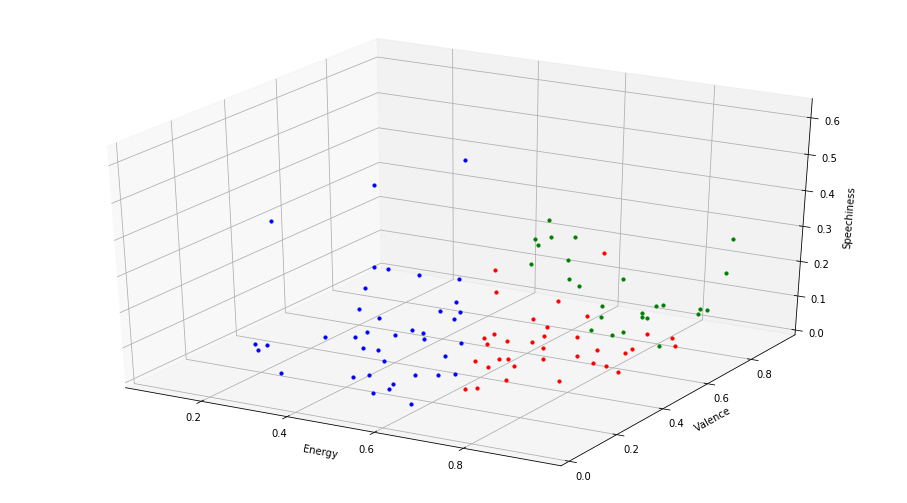

In [16]:
color_mapping = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'purple', 4 : 'orange'}
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')
for i in range(len(df)):
    ax.scatter(df['energy'][i], df['valence'][i], df['speechiness'][i], \
        c = color_mapping[predictions[i]], s = 10)
    
ax.set_xlabel('Energy')
ax.set_ylabel('Valence')
ax.set_zlabel('Speechiness')

plt.show()

In [17]:
tracks_by_cluster = {}
for i in range(len(predictions)):
    if(predictions[i] in tracks_by_cluster.keys()):
        tracks_by_cluster[predictions[i]].append(track_ids[i])
    else:
        tracks_by_cluster[predictions[i]] = [track_ids[i]]
tracks_by_cluster

{0: ['1qRabaD5y56JZzQSm4qB0n',
  '4HGmqytdlTDcbE7Zx2VxAs',
  '33Ig8BivuMggb5HpPyTBob',
  '6H2wnX7ytNeCKERIVqCwgs',
  '6XjNLIoUiU2XKdbNp7PvHl',
  '0Rx0DJI556Ix5gBny6EWmn',
  '3rispwYjQRRCT3vdFmhQCA',
  '3JfbMm4LfBmm96mkKhyG6I',
  '6cTtYJfqMckX2720swzXeY',
  '7ezqQc9fdjV2YNbBIQNAUz',
  '1Z5L1sgdPUPfcuxsfaYzcB',
  '4sozAtIVLF1d9jmFj9VcvV',
  '5usaydQKInuUpnaWQVTGM0',
  '3rREcqxfjNnDXHqr6bq77W',
  '5Xq7KPZSONkhHx6DFTAbTz',
  '5WaXMQMlQpq8pwIdaFP43L',
  '2AAL4PF8WtOgHKHajUBbwh',
  '6MqVhQfCkPdpr8nz0DTt11',
  '5PdEiev2BkKiZtZFcNKjfM',
  '5RsKelNxucrDxgMbZ3vd3W',
  '67HRSCGK3ZQIxb3Spr1cHQ',
  '3bwCMbwDZVtvJDnUTQIdCX',
  '18czZN7uruOjftj71Kt8oj',
  '5yVIlYEHZxQVLyInCdldoS',
  '1kFlDnWmBTvCBxxeGDpIdp',
  '5ASFhZRvMbgqRZJtSmwzex',
  '7MqeeNEYUxb7JeFnaBSSwo',
  '65lIGCfW59BxcEJnnIOCq3',
  '7lozLnUfzcgEpMMVQI7yhA',
  '77ZdAoTHYoF6Umo76HFD4m',
  '7g2uEIBiSXUNkLmEUCv5nq',
  '1Nme6K1PYAh7p7uygyuRdf',
  '3RDcUlLGp3SLp2AmUbUbls',
  '3AGOgQzp0YcPH41u9p7dOp',
  '5uCax9HTNlzGybIStD3vDh'],
 2: ['4WahOhXKxm

In [18]:
len(tracks_by_cluster[0])
len(set(tracks_by_cluster[0]))

35

In [19]:
recommended_tracks = set()
for key in tracks_by_cluster.keys():
    recommended_tracks.update(random.sample(tracks_by_cluster[key], \
                             k = min(int(30 / len(tracks_by_cluster)), len(tracks_by_cluster[key]))))

In [20]:
print(len(recommended_tracks))
recommended_tracks


30


{'0MO1qNhm8aRZchi8CJlIRo',
 '0TYhf0MgEj4YJaKwo5c4Km',
 '0puf9yIluy9W0vpMEUoAnN',
 '0v56EFhzpi5Gs5zeGx3IGO',
 '18czZN7uruOjftj71Kt8oj',
 '1MIpU2U1kUInGTpaCYuVKs',
 '1YWnrz4pqjtt2zlEOuDIFg',
 '1kFlDnWmBTvCBxxeGDpIdp',
 '1mpD5Q8IM32I4bF6eCpU74',
 '1qRabaD5y56JZzQSm4qB0n',
 '2AAL4PF8WtOgHKHajUBbwh',
 '39lS97papXAI72StGRtZBo',
 '3dBE30R12dDxc1jBDaqmo3',
 '3npU19eWW7PoB2Va7UinRu',
 '4HGmqytdlTDcbE7Zx2VxAs',
 '4LfoYkTuIPgJ2RlNkN5P5C',
 '5KYDPulw71N02ojE4VBKZg',
 '5Re82GrvHDJQs0EHgpJDcn',
 '5WaXMQMlQpq8pwIdaFP43L',
 '5uCax9HTNlzGybIStD3vDh',
 '60YqDe8UqfRaSFZ6TvPI9u',
 '67T6l4q3zVjC5nZZPXByU8',
 '6B2zpKDnmfPlAVxXdiYRGj',
 '6FYbr9QzRoZPh0Re8lDO9z',
 '6MqVhQfCkPdpr8nz0DTt11',
 '6VBmpx11gA8W2ZYzfLsr50',
 '6b8Be6ljOzmkOmFslEb23P',
 '71xLha47XAePi0EbzHAbEW',
 '7MqeeNEYUxb7JeFnaBSSwo',
 '7lozLnUfzcgEpMMVQI7yhA'}

In [21]:
sp.user_playlist_add_tracks(
    user = 'u2qt69mreoqsc16jar5z2s7cl',
    playlist_id = '6uxuBQGNKPyVPgsNwXdyw8',
    tracks = list(recommended_tracks)
)

{'snapshot_id': 'MiwwMjQyNjBiNmQyYmQ0NmZjNTgyMmE2NjlkNDM3OGFlMDA5OTgwN2Ez'}

In [ ]:
sp.user_playlist_remove_all_occurrences_of_tracks(user, playlist_id, tracks, snapshot_id=None)